https://pjoshi15.com/change-clothes-stable-diffusion-sam/

In [ ]:

import IPython
import sys

def clean_notebook():
    IPython.display.clear_output(wait=True)
    print("Notebook cleaned.")


!pip install diffusers
!pip install accelerate


# Clean up the notebook
clean_notebook()

Notebook cleaned.


In [ ]:
!wget https://raw.githubusercontent.com/Tuchsanai/AIMaster-seagate-training-2024/main/Dataset/white_tshirt.jpg

--2024-05-29 07:16:26--  https://raw.githubusercontent.com/Tuchsanai/AIMaster-seagate-training-2024/main/Dataset/white_tshirt.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58184 (57K) [image/jpeg]
Saving to: ‘white_tshirt.jpg’

white_tshirt.jpg    100%[===================>]  56.82K  --.-KB/s    in 0.003s  

2024-05-29 07:16:26 (21.0 MB/s) - ‘white_tshirt.jpg’ saved [58184/58184]



# show image with point

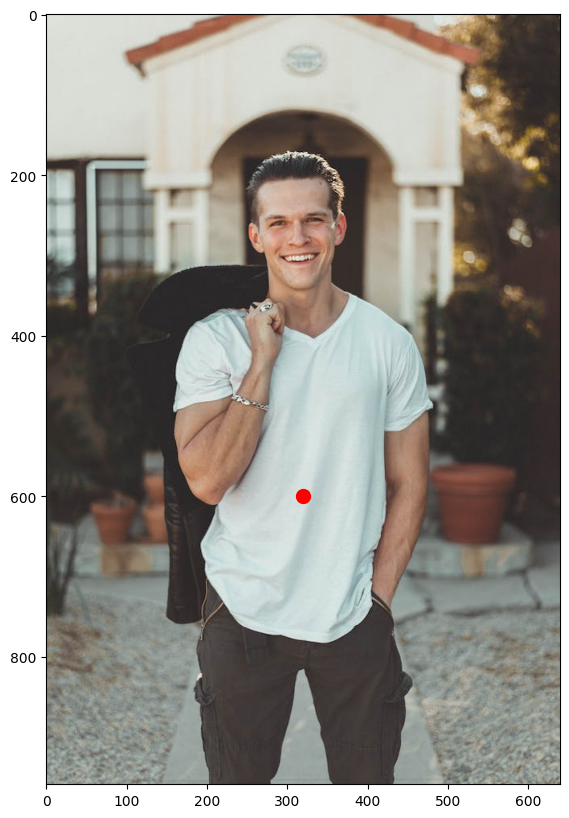

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np


# Input point
input_points = [[320, 600]]


# Open an image file
image_path = '/content/white_tshirt.jpg'  # replace with your image file path
image = Image.open(image_path)

# Convert the image to a NumPy array
image_array = np.array(image)

# Display the image
plt.figure(figsize=(10, 10))
plt.imshow(image_array)

# Extract x and y coordinates from input_points
x_coords = [point[0] for point in input_points]
y_coords = [point[1] for point in input_points]

# Plot the point on the image
plt.scatter(x_coords, y_coords, color='red', s=100)  # s is the size of the points

# Show the plot
plt.show()


In [ ]:

import torch
from torchvision import transforms
from transformers import SamModel, SamProcessor
from diffusers import AutoPipelineForInpainting
from diffusers.utils import load_image, make_image_grid
import matplotlib.pyplot as plt

# downloaded from Hugging Face after running the code below

https://huggingface.co/Zigeng/SlimSAM-uniform-50

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = SamModel.from_pretrained("Zigeng/SlimSAM-uniform-50").to(device )
processor = SamProcessor.from_pretrained("Zigeng/SlimSAM-uniform-50")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/365 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/112M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/466 [00:00<?, ?B/s]

# Create mask image for t-shirt

In [ ]:
import torch

# Define the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Input point for object selection
input_points = [[[320, 600]]]

# Ensure you have defined `img`, `processor`, and `model` objects correctly before this part.
inputs = processor(image, input_points=input_points, return_tensors="pt").to(device)
outputs = model(**inputs)

# Post-process masks
masks = processor.image_processor.post_process_masks(outputs.pred_masks.cpu(),
                                                     inputs["original_sizes"].cpu(),
                                                     inputs["reshaped_input_sizes"].cpu())


In [ ]:
# get number of mask images
len(masks[0][0])

3

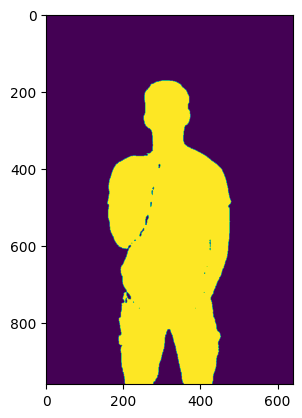

In [ ]:
plt.imshow(masks[0][0][0])

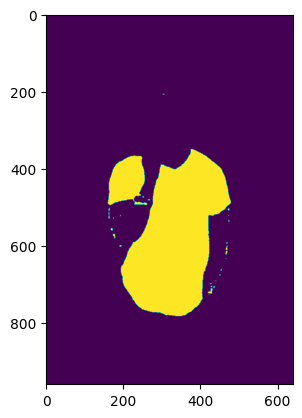

In [ ]:
plt.imshow(masks[0][0][1])

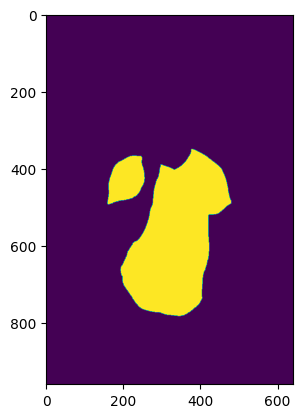

In [ ]:
plt.imshow(masks[0][0][2])

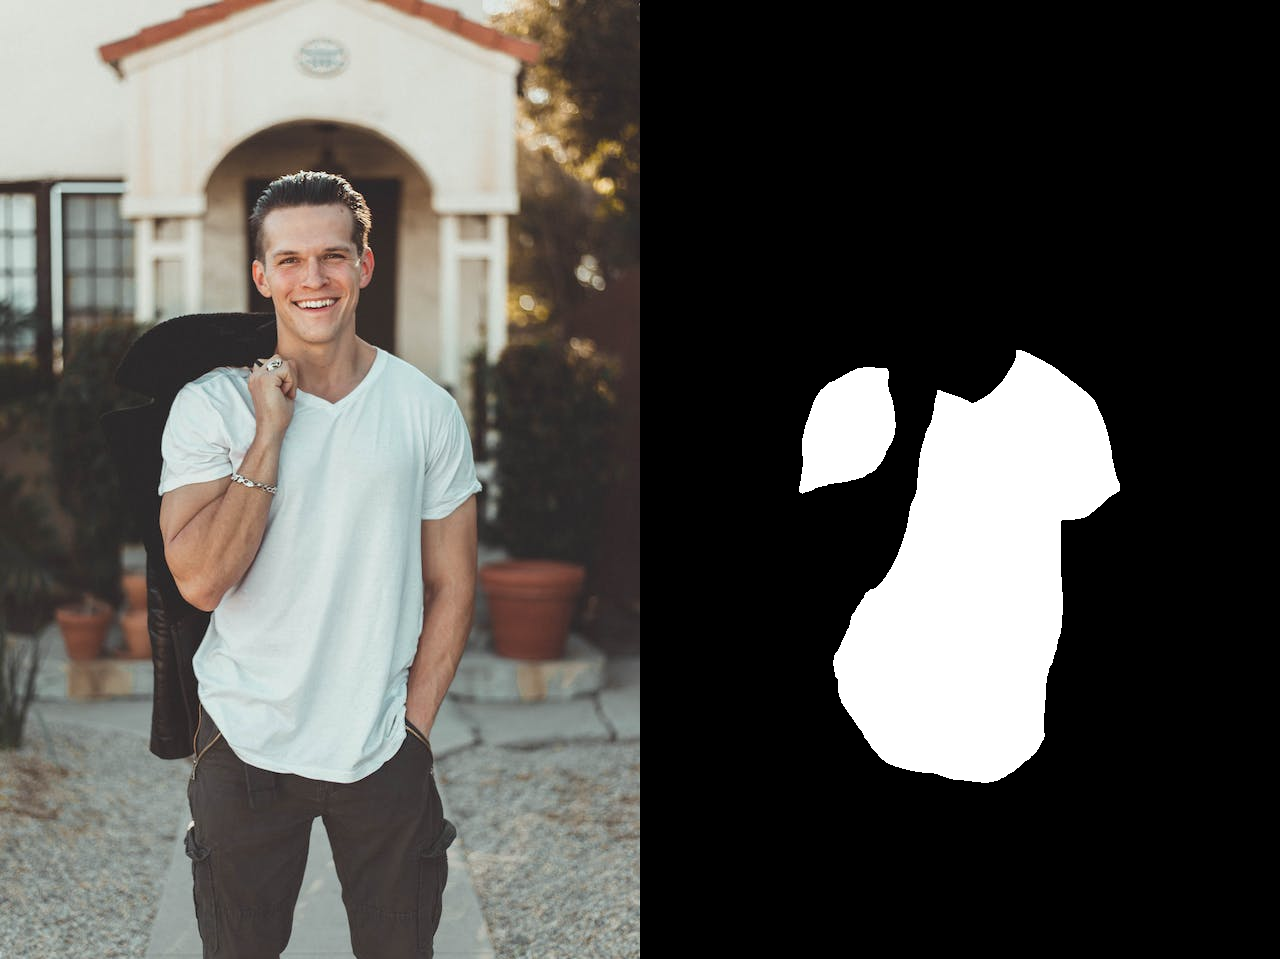

In [ ]:
# Create a ToPILImage transform
to_pil = transforms.ToPILImage()

# Convert boolean tensors to binary tensors
binary_matrix_1 = masks[0][0][2].to(dtype=torch.uint8)


# apply the transform to the tensors
mask_1 = to_pil(binary_matrix_1*255)


# display original image with masks
make_image_grid([image, mask_1], cols = 2, rows = 1)

# import Stable Diffusion model

In [ ]:

# create inpainting pipeline
pipeline = AutoPipelineForInpainting.from_pretrained("redstonehero/ReV_Animated_Inpainting",     torch_dtype=torch.float16 )

pipeline.enable_model_cpu_offload()



model_index.json:   0%|          | 0.00/584 [00:00<?, ?B/s]

unet/diffusion_pytorch_model.safetensors not found


Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

safety_checker/config.json:   0%|          | 0.00/4.59k [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/520 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/465 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/755 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/582 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/492M [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(


  0%|          | 0/24 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


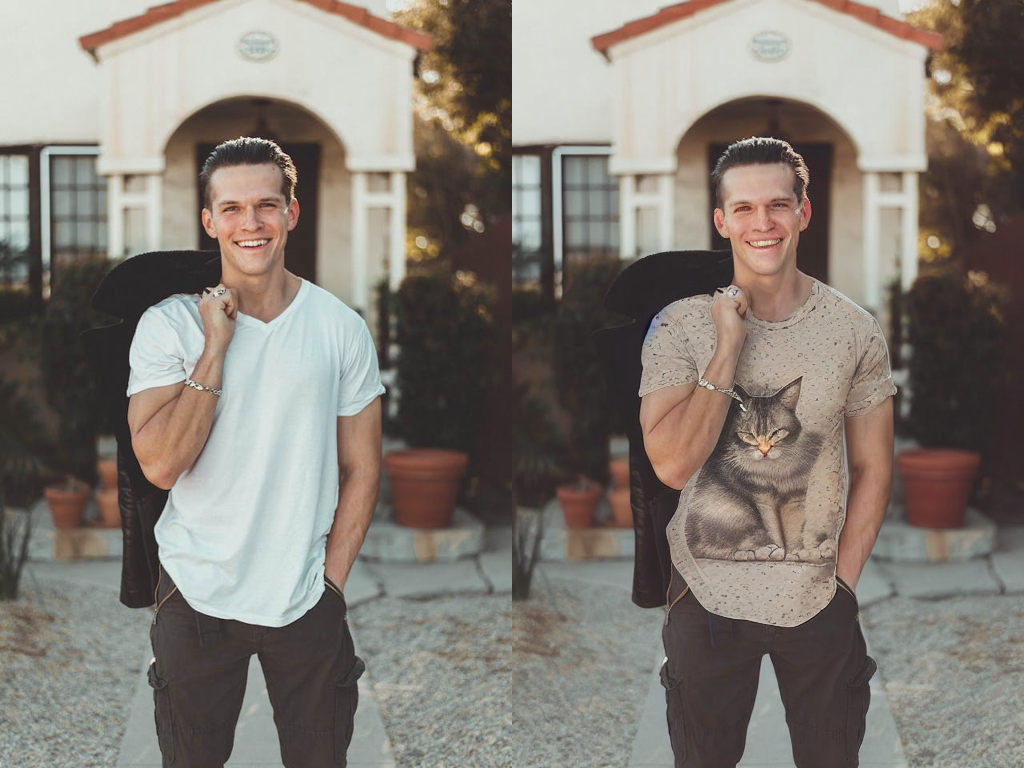

In [ ]:
prompt = "cat print, t-shirt"

# generate image
ximage = pipeline(prompt=prompt,
                 width=512,
                 height=768,
                 num_inference_steps=24,
                 image=image ,
                 mask_image=mask_1,
                 guidance_scale=3,
                 strength=1.0).images[0]

# display input image and generated image
make_image_grid([image.resize([512,768]), ximage], rows = 1, cols = 2)

  0%|          | 0/24 [00:00<?, ?it/s]

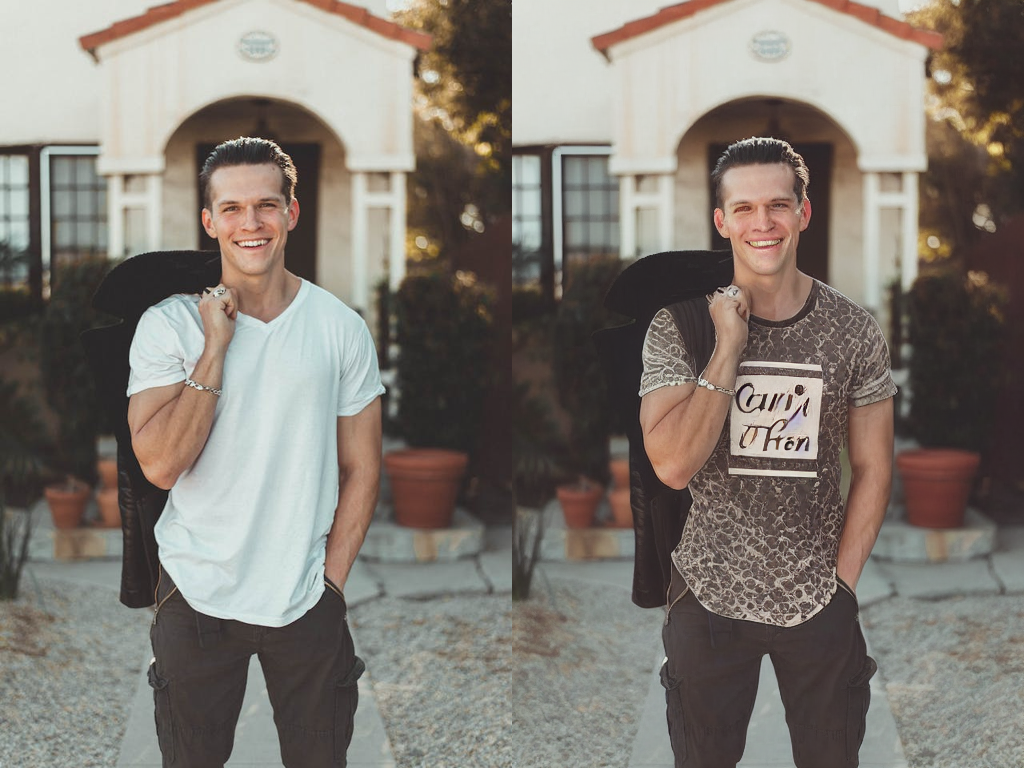

In [ ]:
prompt = "can  print t-shirt"

# generate image
ximage = pipeline(prompt=prompt,
                 width=512,
                 height=768,
                 num_inference_steps=24,
                 image=image ,
                 mask_image=mask_1,
                 guidance_scale=3,
                 strength=1.0).images[0]

# display input image and generated image
make_image_grid([image.resize([512,768]), ximage], rows = 1, cols = 2)